In [1]:
# importing libraries and functions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
 #modules and important packages
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from IPython.core.interactiveshell import InteractiveShell
from scipy.stats import ttest_ind
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from scipy.stats import describe

In [3]:
InteractiveShell.ast_node_interactivity = "all"
%config InlineBackend.figure_format ='retina'
%matplotlib inline

In [4]:
df = pd.read_csv("C:/Users/ff/Downloads/framingham2.csv")
df.head(20)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,62,3,0,0,0,0,0,1,346,102.5,66.5,17.17,80,394,1
1,0,67,2,0,0,1,0,1,1,303,204.0,96.0,27.86,75,394,1
2,0,62,1,0,0,0,0,0,1,233,130.0,87.0,21.34,85,386,0
3,1,64,3,0,0,0,0,1,1,195,176.0,78.0,24.90,95,370,0
4,0,62,3,1,20,1,0,1,1,358,215.0,110.0,37.62,110,368,1
5,0,46,2,1,15,0,0,0,1,233,106.0,60.0,20.84,75,348,0
6,1,47,2,1,20,0,0,1,1,296,141.0,93.0,28.50,68,332,1
7,1,55,1,1,40,0,0,0,1,205,127.0,76.0,22.24,90,325,1
8,0,47,1,1,1,0,0,1,1,160,197.0,109.0,34.91,82,320,1
9,0,54,1,0,0,0,0,0,1,223,110.0,67.5,21.22,78,294,0


In [5]:
df.shape

(3656, 16)

In [6]:
df=pd.DataFrame.sample(df,3000,random_state=23)
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3088,1,45,2,1,5,0,0,1,0,238,141.0,87.0,26.46,54,68,0
3567,0,46,1,1,20,0,0,0,0,182,117.0,78.0,22.15,72,59,0
878,1,49,2,1,5,0,0,0,0,260,111.0,70.0,24.24,75,87,0
152,0,41,2,1,15,0,0,0,0,235,107.5,68.0,21.10,80,113,0
2735,0,46,2,1,20,0,0,0,0,275,126.0,71.0,24.91,80,71,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3096,0,51,1,1,10,0,0,1,0,201,147.5,95.0,22.34,100,67,0
3592,1,46,2,1,43,0,0,1,0,259,125.0,89.0,24.80,100,57,0
1549,0,48,1,0,0,0,0,0,0,222,119.0,85.0,30.46,77,80,0
1704,0,40,2,0,0,0,0,0,0,185,117.5,72.0,21.12,70,79,0


In [7]:
df.shape

(3000, 16)

In [8]:
df.dtypes

male                 int64
age                  int64
education            int64
currentSmoker        int64
cigsPerDay           int64
BPMeds               int64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol              int64
sysBP              float64
diaBP              float64
BMI                float64
heartRate            int64
glucose              int64
TenYearCHD           int64
dtype: object

In [9]:
# check for dupicates
df1 = df[df.duplicated()]
df1

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD


In [10]:
# checking for missing values
df.isna().sum()
null = df[df.isna().any(axis=1)]

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

C:\Users\ff\AppData\Local\Temp\ipykernel_1416\1093788407.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax = ax)


array([[<AxesSubplot:title={'center':'male'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'education'}>,
        <AxesSubplot:title={'center':'currentSmoker'}>],
       [<AxesSubplot:title={'center':'cigsPerDay'}>,
        <AxesSubplot:title={'center':'BPMeds'}>,
        <AxesSubplot:title={'center':'prevalentStroke'}>,
        <AxesSubplot:title={'center':'prevalentHyp'}>],
       [<AxesSubplot:title={'center':'diabetes'}>,
        <AxesSubplot:title={'center':'totChol'}>,
        <AxesSubplot:title={'center':'sysBP'}>,
        <AxesSubplot:title={'center':'diaBP'}>],
       [<AxesSubplot:title={'center':'BMI'}>,
        <AxesSubplot:title={'center':'heartRate'}>,
        <AxesSubplot:title={'center':'glucose'}>,
        <AxesSubplot:title={'center':'TenYearCHD'}>]], dtype=object)

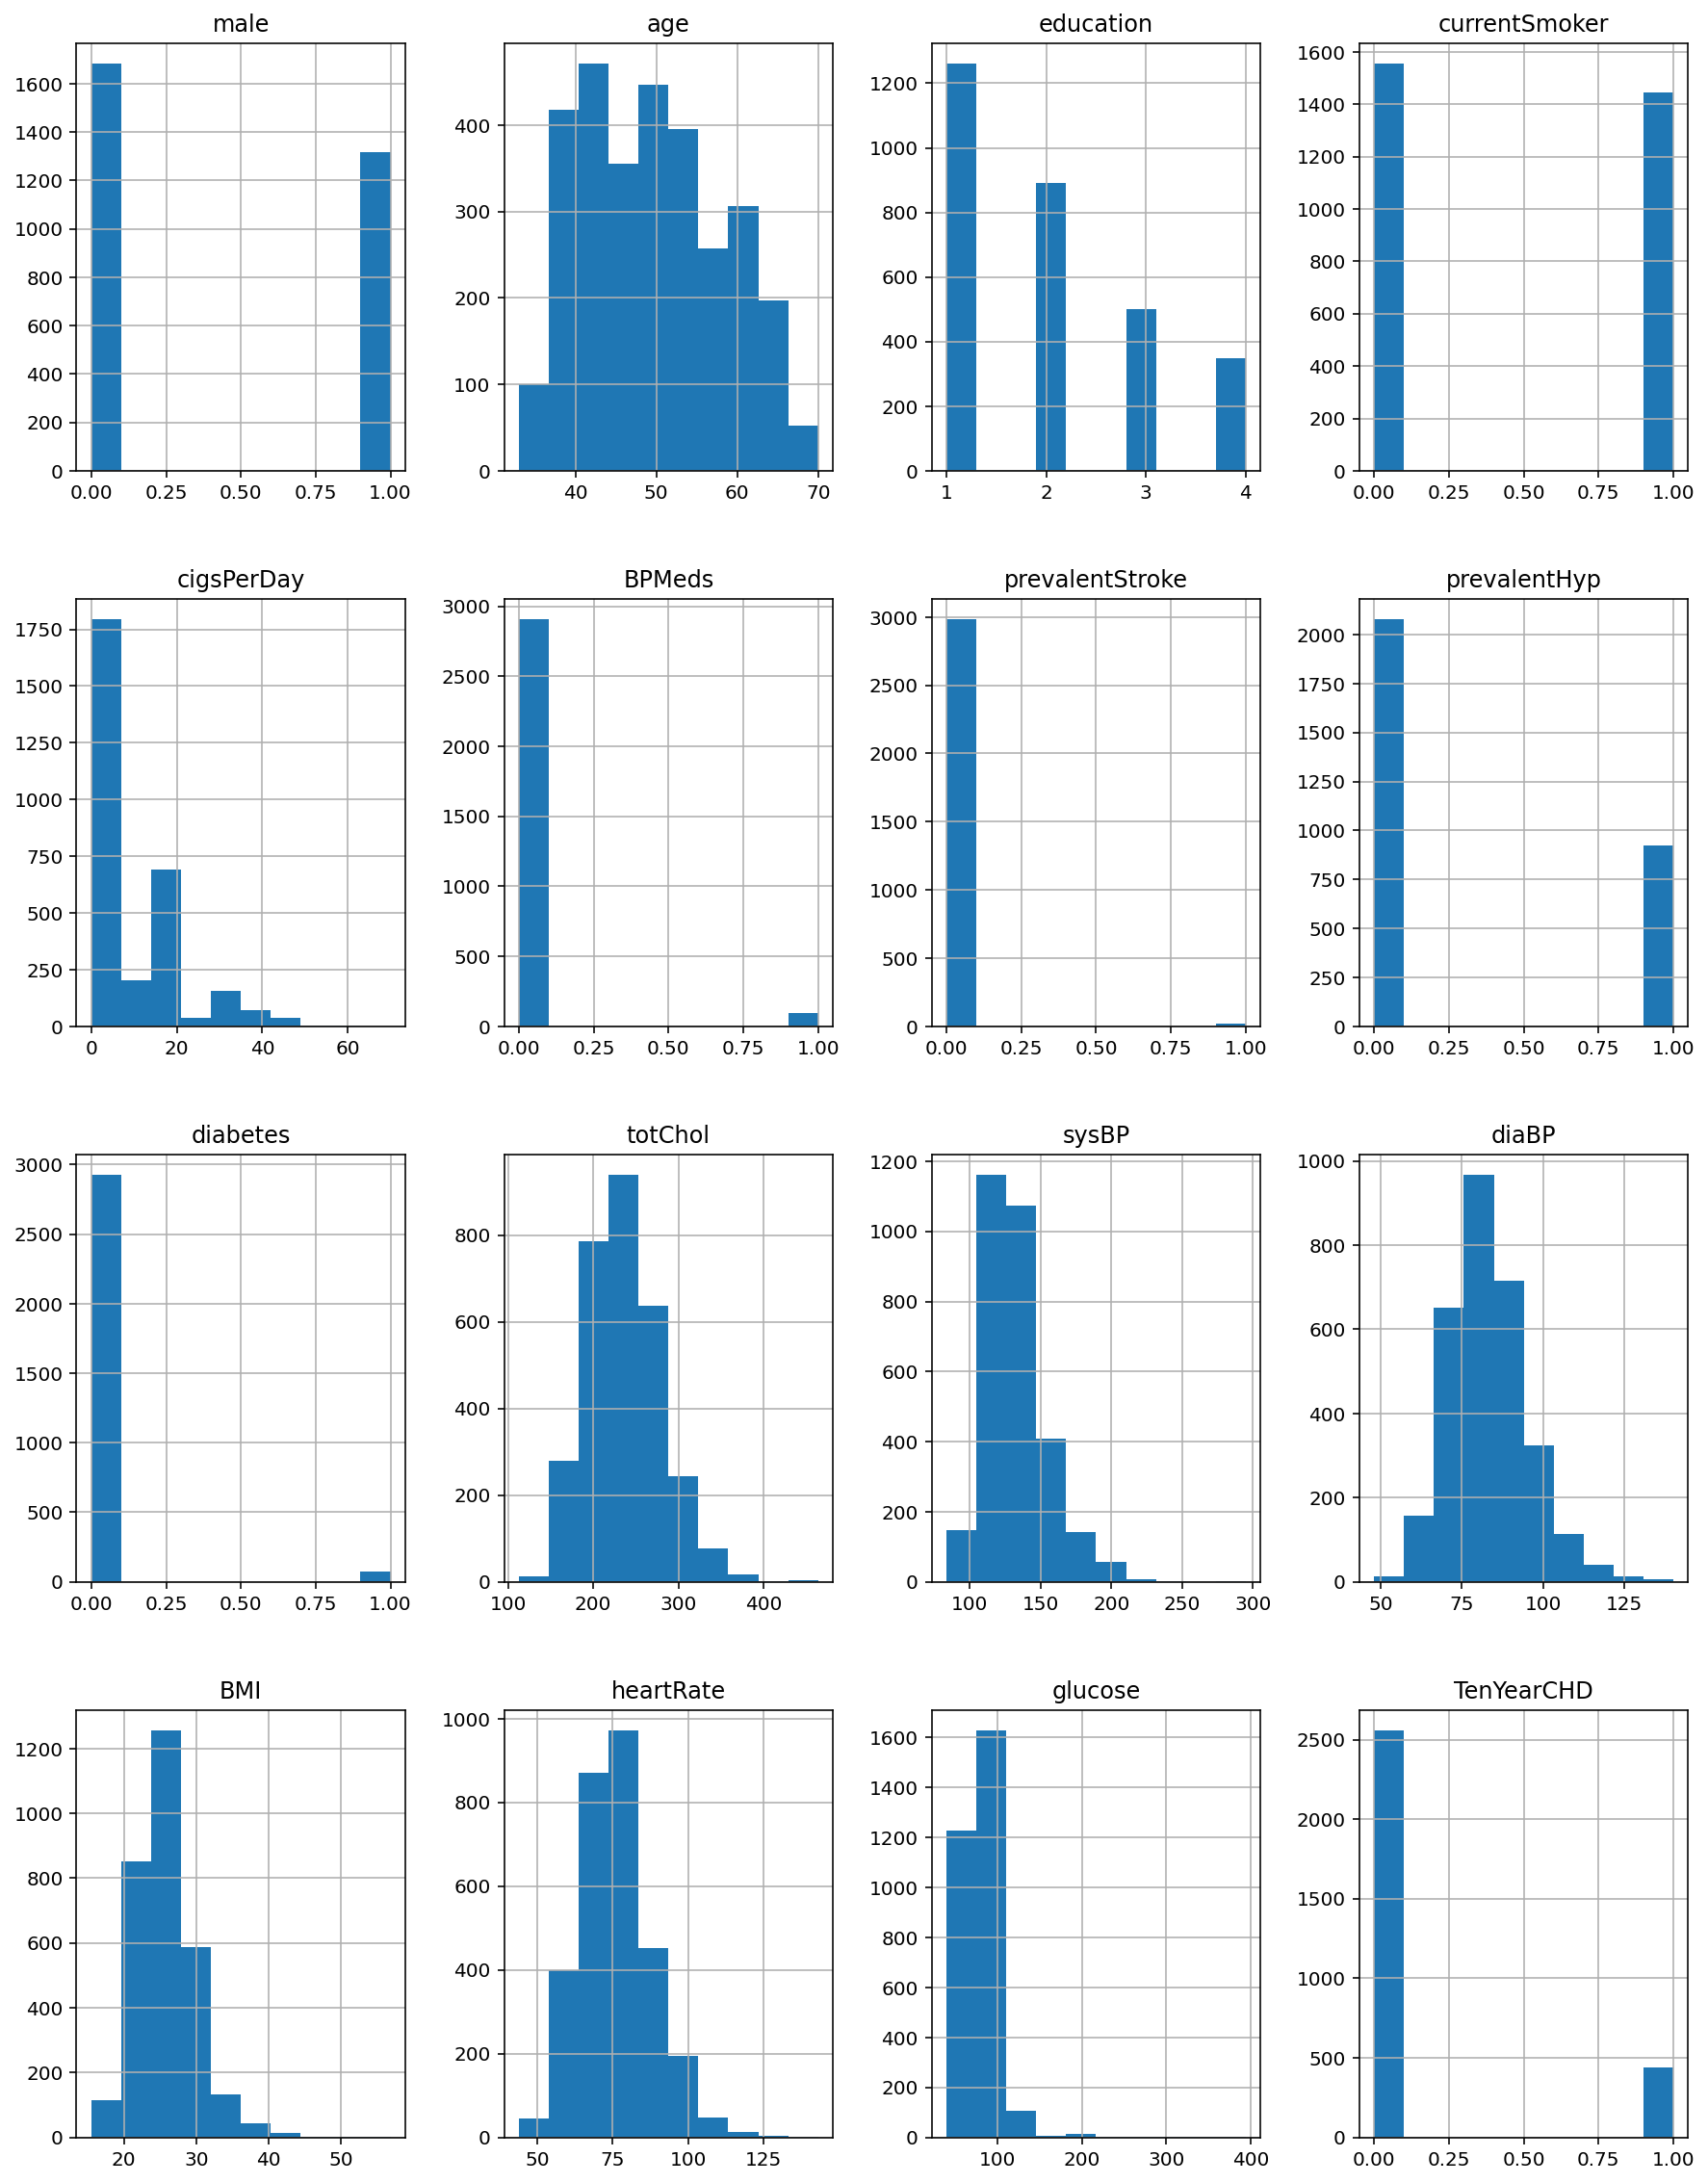

In [11]:
# checking distributions using histograms
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df.hist(ax = ax)

In [12]:
# Checking for more missing data 
df.isna().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [13]:
# Dropping all rows with missing data
df = df.dropna()
df.isna().sum()
df.columns

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [14]:
# separate independent & dependent variables
X = df.iloc[:,0:15]  #independent columns
y = df.iloc[:,-1] #target

In [15]:
X

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
3088,1,45,2,1,5,0,0,1,0,238,141.0,87.0,26.46,54,68
3567,0,46,1,1,20,0,0,0,0,182,117.0,78.0,22.15,72,59
878,1,49,2,1,5,0,0,0,0,260,111.0,70.0,24.24,75,87
152,0,41,2,1,15,0,0,0,0,235,107.5,68.0,21.10,80,113
2735,0,46,2,1,20,0,0,0,0,275,126.0,71.0,24.91,80,71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3096,0,51,1,1,10,0,0,1,0,201,147.5,95.0,22.34,100,67
3592,1,46,2,1,43,0,0,1,0,259,125.0,89.0,24.80,100,57
1549,0,48,1,0,0,0,0,0,0,222,119.0,85.0,30.46,77,80
1704,0,40,2,0,0,0,0,0,0,185,117.5,72.0,21.12,70,79


In [16]:
y

3088    0
3567    0
878     0
152     0
2735    0
       ..
3096    0
3592    0
1549    0
1704    0
3328    0
Name: TenYearCHD, Length: 3000, dtype: int64

In [17]:
import statistics as sc

In [18]:
m=sc.mean(y)
m
s=sc.stdev(y) #sample standard deviation
s
psd=sc.pstdev(y) #population standard deviation
print("population sd=",psd,"and Sample sd=",s)

0.14733333333333334

0.35449698389796375

population sd= 0.35443789614292404 and Sample sd= 0.35449698389796375


In [19]:
sigma=np.std(y) #Population standard deviation
print("population sd=",sigma,".  np.std(x) does not return sample standard deviation")

population sd= 0.35443789614291593 .  np.std(x) does not return sample standard deviation


In [20]:
import scipy.stats as ss
rslt_df = X.loc[X['totChol'] > 240]
if(rslt_df,bool() == True):
    alpha=0.05
    m0=22
    m,s,n,df,sem=np.mean(y), sc.stdev(y),len(y),len(y)-1,ss.sem(y)
    tcal=(m-m0)/sem
    tc=ss.t.ppf(1-alpha,df)
    print("The calculated value of t is",tcal,"and the critical value is",tc)
    if tcal>tc:
        print("The null hypothesis is rejected at 5% level of significance")
    else:
        print("The null hypothesis is not rejected at 5% level of significance")

    # P-VALUE APPROACH----------------------------------------------------
    print("PVALUE APPROACH")
    PVALUE=ss.t.sf(tcal,df)
    print("P-value is",PVALUE)

    if PVALUE<alpha:
        print("The null hypothesis is rejected at 5% level of significance")
    else:
        print("The null hypothesis is not rejected at 5% level of significance")

The calculated value of t is -3376.389368215246 and the critical value is 1.6453618773068346
The null hypothesis is not rejected at 5% level of significance
PVALUE APPROACH
P-value is 1.0
The null hypothesis is not rejected at 5% level of significance


In [21]:
#95% confidence interval
hart_rate = X['heartRate']
#hart_rate
conf_interval=ss.t.interval(alpha=0.95, df=len(hart_rate)-1, loc=np.mean(hart_rate), scale=ss.sem(hart_rate))
conf_interval

(75.34690003601263, 76.21376663065404)

In [36]:
# create_new dataset for medical condition
df3 = X[['sysBP', 'glucose','age','totChol','cigsPerDay','diaBP','prevalentHyp','diabetes','BPMeds']]
df3.head()

,sysBP,glucose,age,totChol,cigsPerDay,diaBP,prevalentHyp,diabetes,BPMeds
0,102.5,394,62,346,0,66.5,0,1,0
1,204.0,394,67,303,0,96.0,1,1,1
2,130.0,386,62,233,0,87.0,0,1,0
3,176.0,370,64,195,0,78.0,1,1,0
4,215.0,368,62,358,20,110.0,1,1,1


<AxesSubplot:>

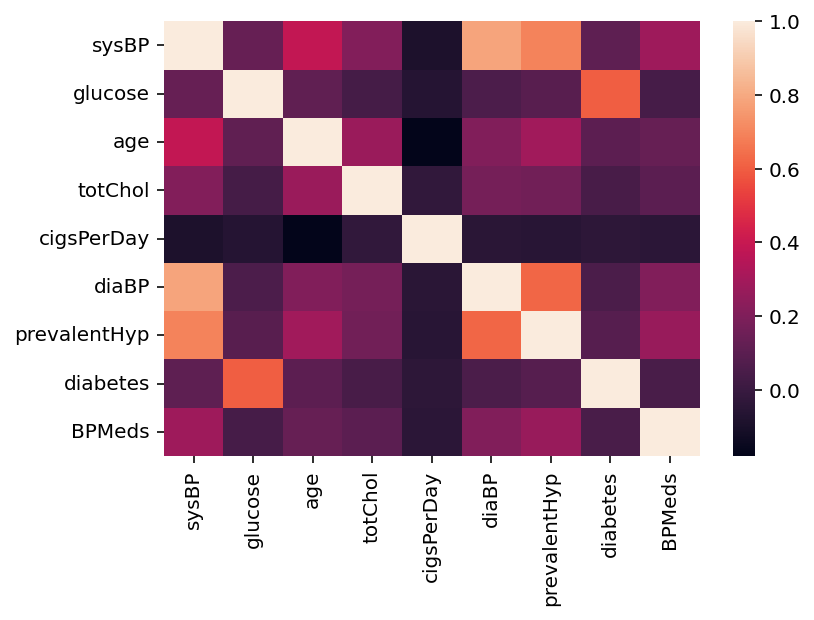

In [23]:
df_corr = df3.corr()
sns.heatmap(df_corr)

In [ ]:
statisticcs.corrrelation(x,y,/)

In [24]:
df = pd.read_csv("C:/Users/ff/Downloads/framingham2.csv")
# separate independent & dependent variables
X = df.iloc[:,0:15]  #independent columns
y = df.iloc[:,-1] #target
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=0)

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)
model=logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)
model.classes_
model.intercept_
model.coef_
model.predict_proba(X_test)
print (X_test) #test dataset
print (y_pred) #predicted values

C:\Users\ff\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

C:\Users\ff\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0, 1], dtype=int64)

array([-0.2009062])

array([[ 3.27723767e-01,  3.48886038e-02, -2.97255373e-01,
        -1.59930303e-01,  1.00429571e-02,  8.10972776e-02,
         1.19716154e-02,  4.82794712e-01,  6.45284812e-02,
         1.01420430e-05,  1.11892033e-02, -1.72283555e-02,
        -6.88754034e-02, -2.68511152e-02,  7.87097891e-03]])

array([[0.83751096, 0.16248904],
       [0.74859377, 0.25140623],
       [0.93206177, 0.06793823],
       ...,
       [0.89250383, 0.10749617],
       [0.69452489, 0.30547511],
       [0.80040642, 0.19959358]])

      male  age  education  currentSmoker  cigsPerDay  BPMeds  \
1728     1   35          3              1          15       0   
2577     1   47          1              0           0       0   
999      0   55          3              1          20       0   
3317     1   51          3              1          20       0   
2108     1   44          1              0           0       0   
...    ...  ...        ...            ...         ...     ...   
1122     0   43          1              1          25       0   
778      0   34          2              0           0       0   
984      0   44          3              0           0       0   
2030     0   57          1              0           0       0   
1410     1   57          2              1           1       0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
1728                0             0         0      196  107.5   66.5  22.64   
2577                0             1         0      283  146.5

In [27]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[913,   5],
       [172,   7]], dtype=int64)

In [28]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8386508659981768
Precision: 0.5833333333333334
Recall: 0.03910614525139665


In [42]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100, random_state = 23)
regressor.fit(X, y) 
print (X_test) #test dataset
print (y_pred) #predicted values
y_pred = regressor.predict(X_test)

RandomForestRegressor(random_state=23)

      male  age  education  currentSmoker  cigsPerDay  BPMeds  \
1728     1   35          3              1          15       0   
2577     1   47          1              0           0       0   
999      0   55          3              1          20       0   
3317     1   51          3              1          20       0   
2108     1   44          1              0           0       0   
...    ...  ...        ...            ...         ...     ...   
1122     0   43          1              1          25       0   
778      0   34          2              0           0       0   
984      0   44          3              0           0       0   
2030     0   57          1              0           0       0   
1410     1   57          2              1           1       0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
1728                0             0         0      196  107.5   66.5  22.64   
2577                0             1         0      283  146.5

In [41]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8386508659981768
Precision: 0.5833333333333334
Recall: 0.03910614525139665


In [43]:
from sklearn import metrics

print('Accuracy:', metrics.mean_absolute_error(y_test, y_pred))
print('Precition:', metrics.mean_squared_error(y_test, y_pred))
print('Recall:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Accuracy: 0.09338195077484049
Precition: 0.018661257976299
Recall: 0.1366062149988023


In [40]:
regressor.score(X_test,y_test)

0.8633346368715084

In [31]:
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,BaggingClassifier

In [37]:
#Boosting
#adb = AdaBoostClassifier(n_estimators=3000)
adb.fit(X_train, y_train)

y_pred_adb = adb.predict(X_test)

adb_acc = metrics.accuracy_score(y_test, y_pred_adb)

print("AdaBoost Accuracy : ",adb_acc)

NameError: name 'adb' is not defined

In [38]:
# Bagging Regression

bgr = BaggingClassifier(n_estimators=3000)
bgr.fit(X_train, y_train)

y_pred_bgr = bgr.predict(X_test)

bgr_acc = metrics.accuracy_score(y_test, y_pred_bgr)

print("Bagging Regression Accuracy : ",bgr_acc)


BaggingClassifier(n_estimators=3000)

Bagging Regression Accuracy :  0.8322698268003647
